In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
df = pd.read_csv('mbti_results.csv')
df.head()

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type
0,Муж,Инспектор таможни,Нет,IT,Начальство;Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,Администратор
1,Жен,преподаватель,Да,аналитик,Коллектив (коллеги);Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Нет,Нет,Зарплата;Коллектив (коллеги);Расстояние до работы,высщее,Консул
2,Муж,Лектор,Да,NaN,Зарплата,Минимальная,Да,Да,Нет,Нет,Нет,Начальство;Коллектив (коллеги),Masters in Computer Science,Консул
3,Жен,экономист,Да,NaN,Все устраивает,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата;Расстояние до работы,экономика,Менеджер
4,Муж,"руководителем структурного подразделения, юрист",Да,NaN,Все устраивает,Удовлетворительная,Нет,Да,Нет,Да,Нет,Ни один,юрист,Администратор


In [3]:
df.describe()

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type
count,58,58,58,19,58,58,58,58,58,58,58,58,58,58
unique,2,49,2,17,10,3,2,2,2,2,2,12,51,14
top,Жен,Бухгалтер,Да,IT,Все устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Да,Зарплата,Финансист,Активист
freq,41,3,50,2,33,44,41,45,33,35,39,16,3,9


In [4]:
df.dtypes

gender                       object
current_job                  object
like_job                     object
pref_specialty               object
not_pref_confitions          object
salary_type                  object
norm_sal_good_job_min_sal    object
good_sal_good_job_min_sal    object
norm_sal_bad_job_good_sal    object
min_sal_bad_job_norm_sal     object
min_sal_bad_job_good_sal     object
changing_factors             object
your_speciality              object
personality_type             object
dtype: object

In [5]:
df.isna().sum()

gender                        0
current_job                   0
like_job                      0
pref_specialty               39
not_pref_confitions           0
salary_type                   0
norm_sal_good_job_min_sal     0
good_sal_good_job_min_sal     0
norm_sal_bad_job_good_sal     0
min_sal_bad_job_norm_sal      0
min_sal_bad_job_good_sal      0
changing_factors              0
your_speciality               0
personality_type              0
dtype: int64

In [6]:
df['pref_specialty'].fillna(value='Все устраивает', inplace=True)
df.head()

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type
0,Муж,Инспектор таможни,Нет,IT,Начальство;Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,Администратор
1,Жен,преподаватель,Да,аналитик,Коллектив (коллеги);Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Нет,Нет,Зарплата;Коллектив (коллеги);Расстояние до работы,высщее,Консул
2,Муж,Лектор,Да,Все устраивает,Зарплата,Минимальная,Да,Да,Нет,Нет,Нет,Начальство;Коллектив (коллеги),Masters in Computer Science,Консул
3,Жен,экономист,Да,Все устраивает,Все устраивает,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата;Расстояние до работы,экономика,Менеджер
4,Муж,"руководителем структурного подразделения, юрист",Да,Все устраивает,Все устраивает,Удовлетворительная,Нет,Да,Нет,Да,Нет,Ни один,юрист,Администратор


In [7]:
df.isna().sum()

gender                       0
current_job                  0
like_job                     0
pref_specialty               0
not_pref_confitions          0
salary_type                  0
norm_sal_good_job_min_sal    0
good_sal_good_job_min_sal    0
norm_sal_bad_job_good_sal    0
min_sal_bad_job_norm_sal     0
min_sal_bad_job_good_sal     0
changing_factors             0
your_speciality              0
personality_type             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   gender                     58 non-null     object
 1   current_job                58 non-null     object
 2   like_job                   58 non-null     object
 3   pref_specialty             58 non-null     object
 4   not_pref_confitions        58 non-null     object
 5   salary_type                58 non-null     object
 6   norm_sal_good_job_min_sal  58 non-null     object
 7   good_sal_good_job_min_sal  58 non-null     object
 8   norm_sal_bad_job_good_sal  58 non-null     object
 9   min_sal_bad_job_norm_sal   58 non-null     object
 10  min_sal_bad_job_good_sal   58 non-null     object
 11  changing_factors           58 non-null     object
 12  your_speciality            58 non-null     object
 13  personality_type           58 non-null     object
dtypes: object(14

In [10]:
types = np.unique(np.array(df['personality_type']))
types

array(['Администратор', 'Активист', 'Артист', 'Борец', 'Делец',
       'Защитник', 'Командир', 'Консул', 'Менеджер', 'Полемист',
       'Посредник', 'Развлекатель', 'Стратег', 'Ученый'], dtype=object)

In [11]:
def replace_word_in_column(df, column_name, old_word, new_word):
    df[column_name] = df[column_name].apply(lambda x: x.replace(old_word, new_word))

In [12]:
replace_word_in_column(df, 'personality_type', 'Администратор', 'ISTJ')
replace_word_in_column(df, 'personality_type', 'Активист', 'INFJ')
replace_word_in_column(df, 'personality_type', 'Артист', 'ISFP')
replace_word_in_column(df, 'personality_type', 'Борец', 'ENFP')
replace_word_in_column(df, 'personality_type', 'Делец', 'ESTP')
replace_word_in_column(df, 'personality_type', 'Защитник', 'ISFJ')
replace_word_in_column(df, 'personality_type', 'Командир', 'ENTJ')
replace_word_in_column(df, 'personality_type', 'Консул', 'ESFJ')
replace_word_in_column(df, 'personality_type', 'Менеджер', 'ESTJ')
replace_word_in_column(df, 'personality_type', 'Полемист', 'ENTP')
replace_word_in_column(df, 'personality_type', 'Посредник', 'INFP')
replace_word_in_column(df, 'personality_type', 'Развлекатель', 'ESFP')
replace_word_in_column(df, 'personality_type', 'Стратег', 'INTJ')
replace_word_in_column(df, 'personality_type', 'Ученый', 'INTP')
replace_word_in_column(df, 'personality_type', 'Тренер', 'ENFJ')
replace_word_in_column(df, 'personality_type', 'Виртуоз', 'ISTP')

In [13]:
types = np.unique(np.array(df['personality_type']))
types

array(['ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ',
       'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ'], dtype=object)

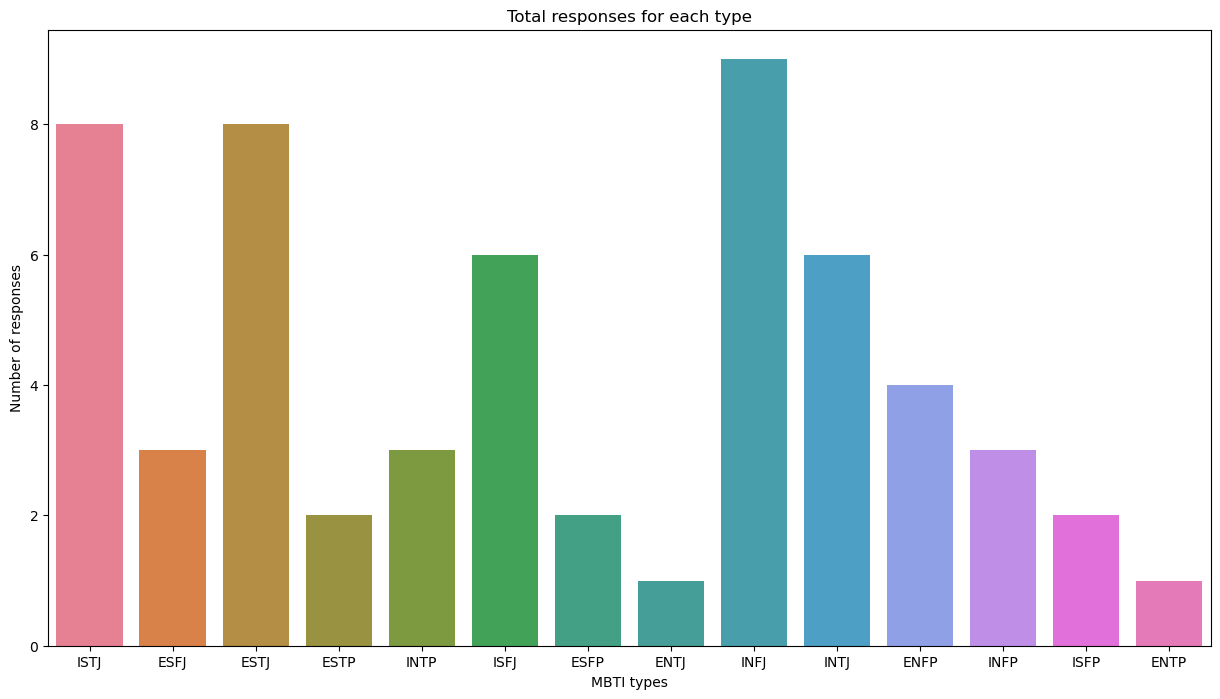

In [14]:
sns.countplot(x='personality_type', data=df, palette="husl")
plt.gcf().set_size_inches(15, 8)
plt.xlabel('MBTI types')
plt.ylabel('Number of responses')
plt.title('Total responses for each type')
plt.show()

Больше всего ответов с типом личности INFJ

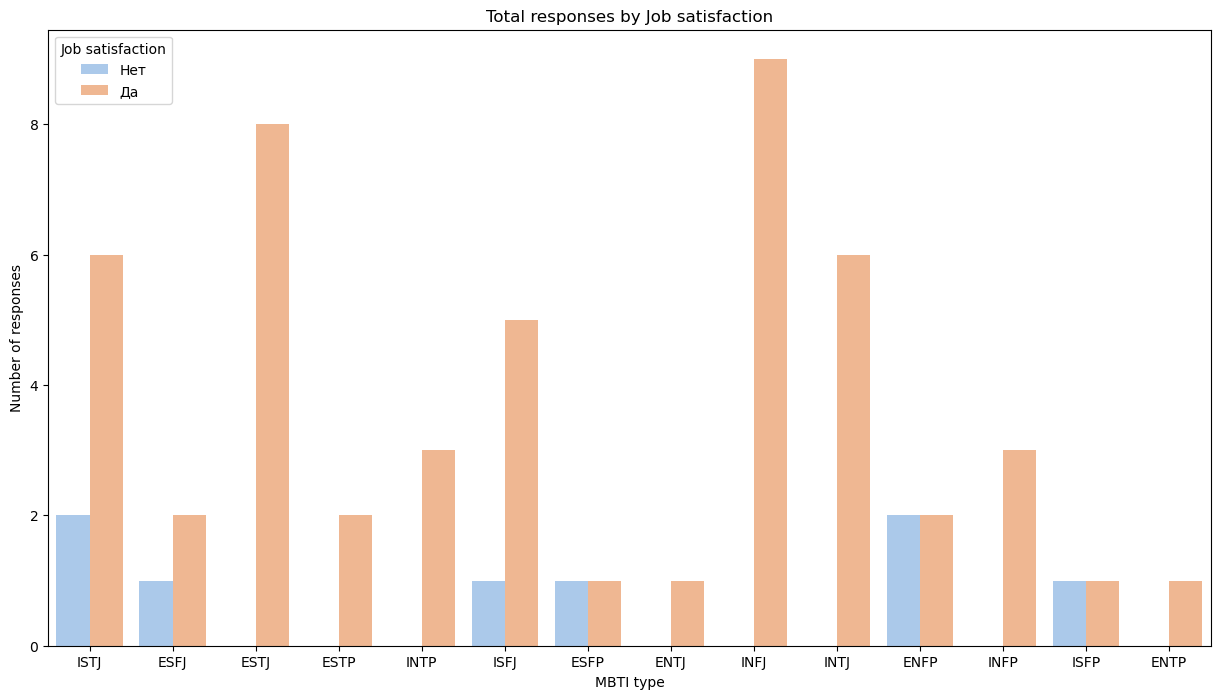

In [15]:
sns.countplot(x='personality_type', data=df,palette="pastel", hue='like_job')
plt.gcf().set_size_inches(15, 8)
plt.ylabel('Number of responses')
plt.xlabel('MBTI type')
plt.title('Total responses by Job satisfaction')
plt.legend(title='Job satisfaction')
plt.show()

Больше всего довольны своей работой люди с типом личности INFJ

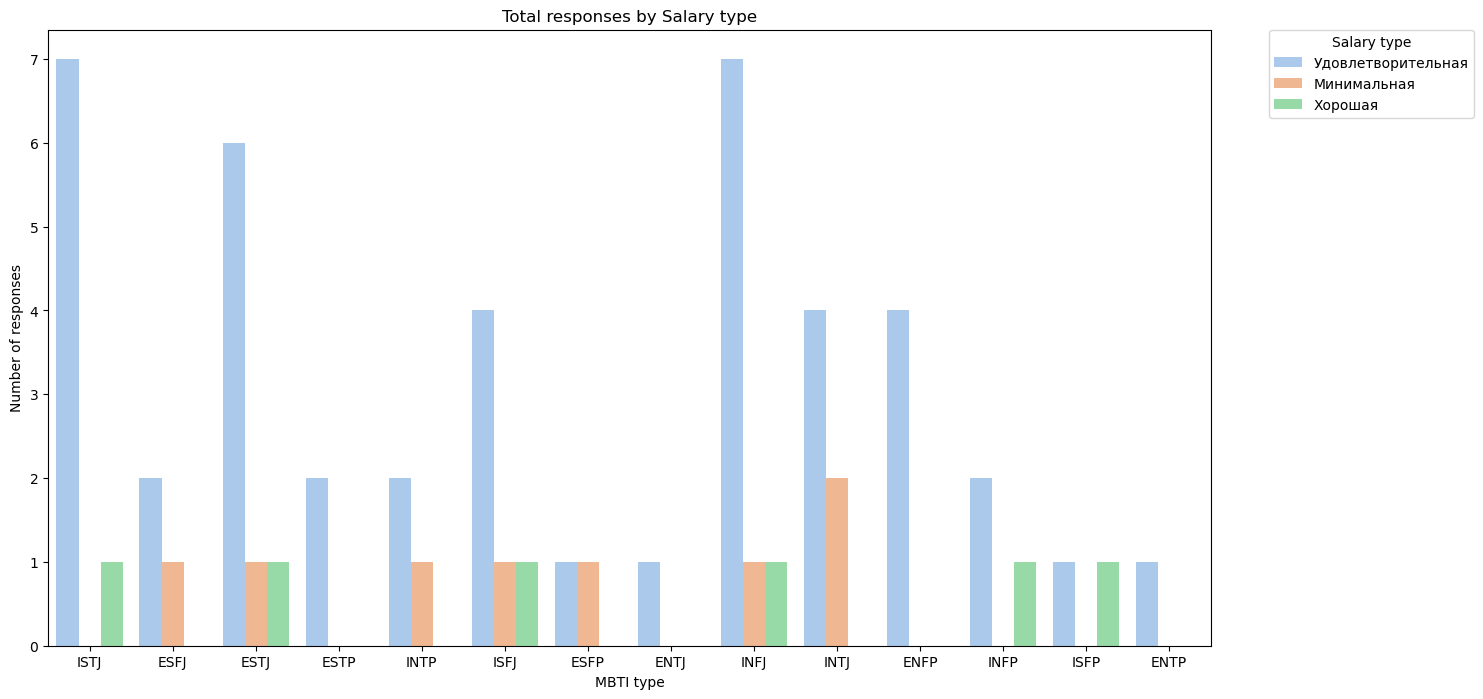

In [16]:
sns.countplot(x='personality_type', data=df, palette="pastel", hue='salary_type')
plt.gcf().set_size_inches(15, 8)
plt.ylabel('Number of responses')
plt.xlabel('MBTI type')
plt.title('Total responses by Salary type')
plt.legend(bbox_to_anchor=( 1.05 , 1 ),borderaxespad=0, title='Salary type')
plt.show()

У типов личности ISTJ и INFJ наиболее усредненные зарплаты

Удовлетворительная зарплата, хорошая работа, маленькая зарплата

In [17]:
first = df.groupby('norm_sal_good_job_min_sal')['norm_sal_good_job_min_sal'].count()
first

norm_sal_good_job_min_sal
Да     17
Нет    41
Name: norm_sal_good_job_min_sal, dtype: int64

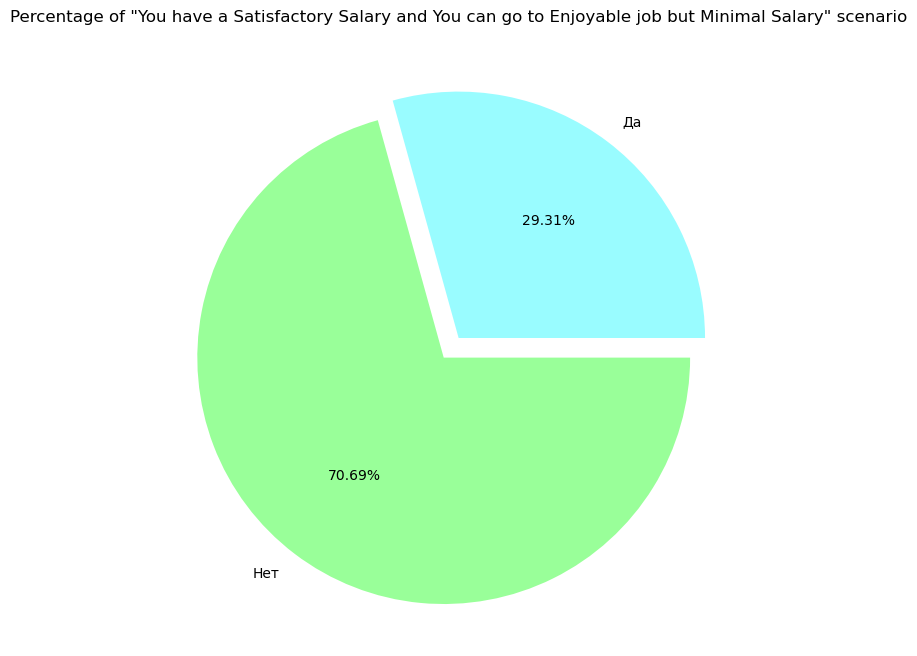

In [18]:
arr=[17,41]
labels=['Да','Нет']
colors=['#99fcff','#99ff99']
explode=[0.0,0.1]
plt.pie(arr,labels=labels,colors=colors,autopct='%0.2f%%',explode=explode)
plt.title('Percentage of "You have a Satisfactory Salary and You can go to Enjoyable job but Minimal Salary" scenario')
plt.gcf().set_size_inches(15, 8)
plt.show();

Удовлетворительная зарплата, плохая работа, хорошая зарплата

In [19]:
second = df.groupby('norm_sal_bad_job_good_sal')['norm_sal_bad_job_good_sal'].count()
second

norm_sal_bad_job_good_sal
Да     25
Нет    33
Name: norm_sal_bad_job_good_sal, dtype: int64

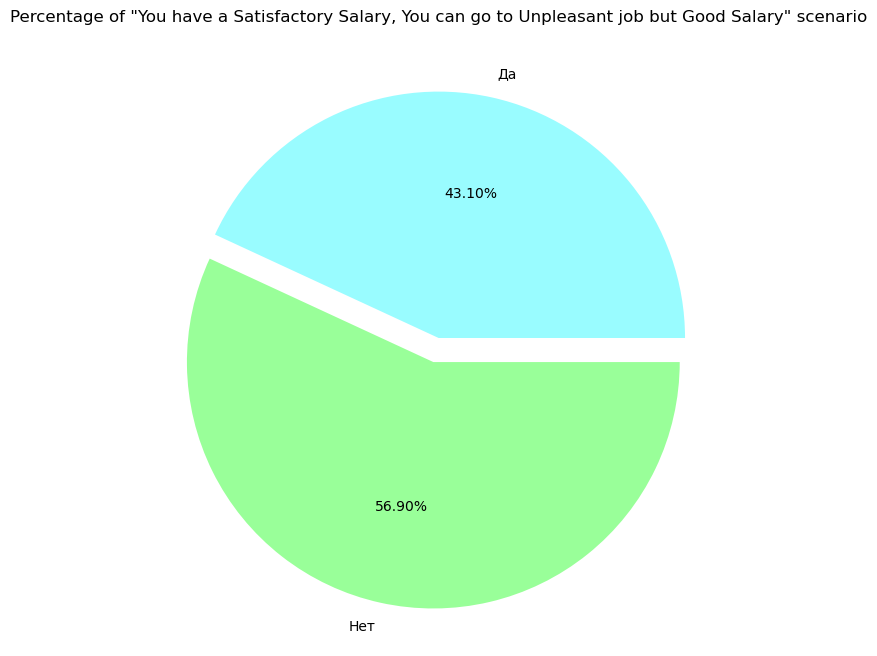

In [20]:
arr=[25,33]
labels=['Да','Нет']
colors=['#99fcff','#99ff99']
explode=[0.0,0.1]
plt.pie(arr,labels=labels,colors=colors,autopct='%0.2f%%',explode=explode)
plt.title('Percentage of "You have a Satisfactory Salary, You can go to Unpleasant job but Good Salary" scenario')
plt.gcf().set_size_inches(15, 8)
plt.show();

Маленькая зарплата, плохая работа, удовлетворительная зарплата

In [21]:
third = df.groupby('min_sal_bad_job_norm_sal')['min_sal_bad_job_norm_sal'].count()
third

min_sal_bad_job_norm_sal
Да     23
Нет    35
Name: min_sal_bad_job_norm_sal, dtype: int64

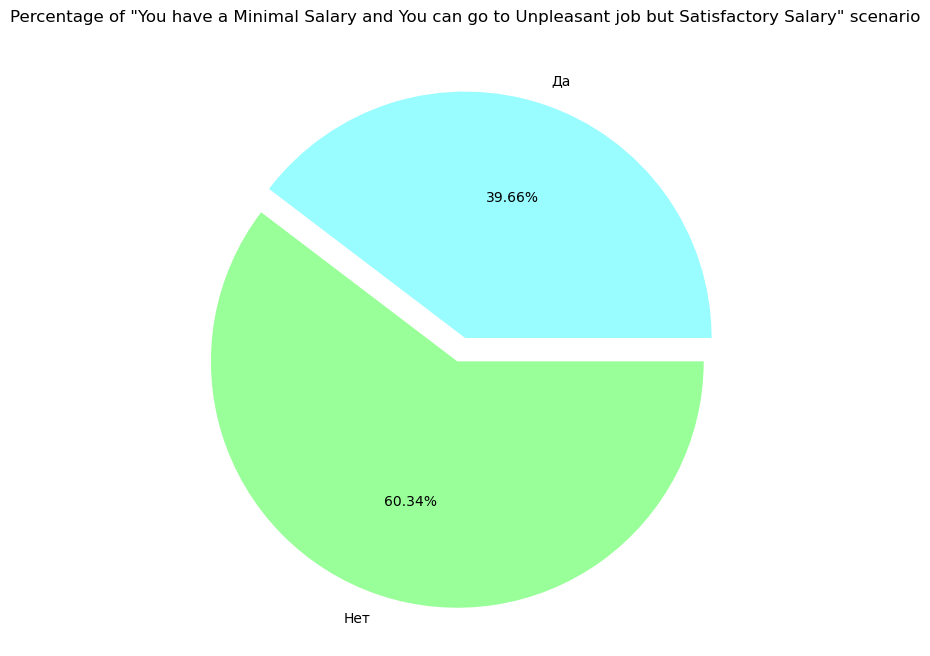

In [22]:
arr=[23,35]
labels=['Да','Нет']
colors=['#99fcff','#99ff99']
explode=[0.0,0.1]
plt.pie(arr,labels=labels,colors=colors,autopct='%0.2f%%',explode=explode)
plt.title('Percentage of "You have a Minimal Salary and You can go to Unpleasant job but Satisfactory Salary" scenario')
plt.gcf().set_size_inches(15, 8)
plt.show();

Маленькая зарплата, плохая работа, хорошая зарплата

In [23]:
fourth = df.groupby('min_sal_bad_job_good_sal')['min_sal_bad_job_good_sal'].count()
fourth

min_sal_bad_job_good_sal
Да     39
Нет    19
Name: min_sal_bad_job_good_sal, dtype: int64

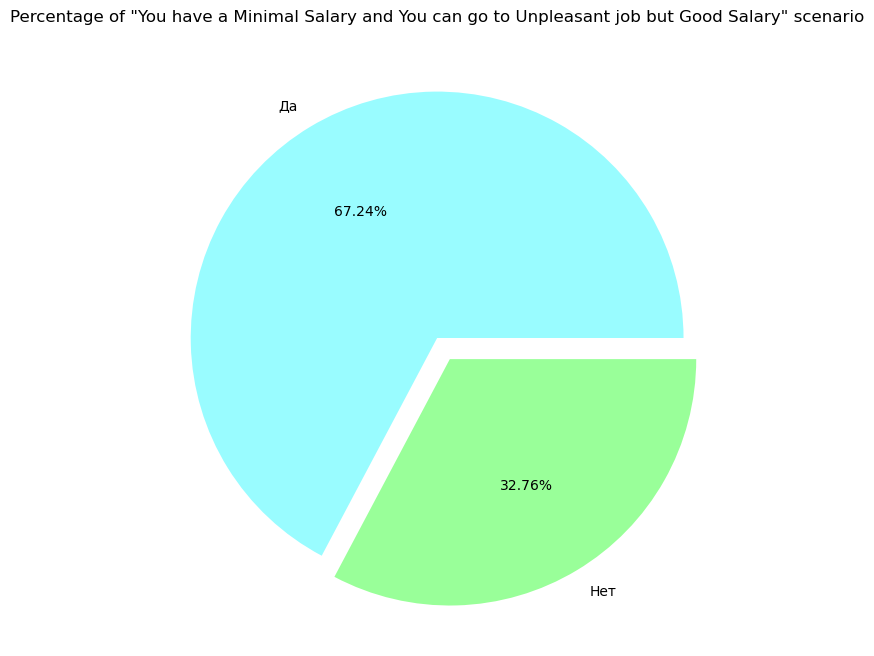

In [24]:
arr=[39,19]
labels=['Да','Нет']
colors=['#99fcff','#99ff99']
explode=[0.0,0.1]
plt.pie(arr,labels=labels,colors=colors,autopct='%0.2f%%',explode=explode)
plt.title('Percentage of "You have a Minimal Salary and You can go to Unpleasant job but Good Salary" scenario')
plt.gcf().set_size_inches(15, 8)
plt.show();

Хорошая зарплата, хорошая работа, маленькая зарплата

In [25]:
fifth = df.groupby('good_sal_good_job_min_sal')['good_sal_good_job_min_sal'].count()
fifth

good_sal_good_job_min_sal
Да     13
Нет    45
Name: good_sal_good_job_min_sal, dtype: int64

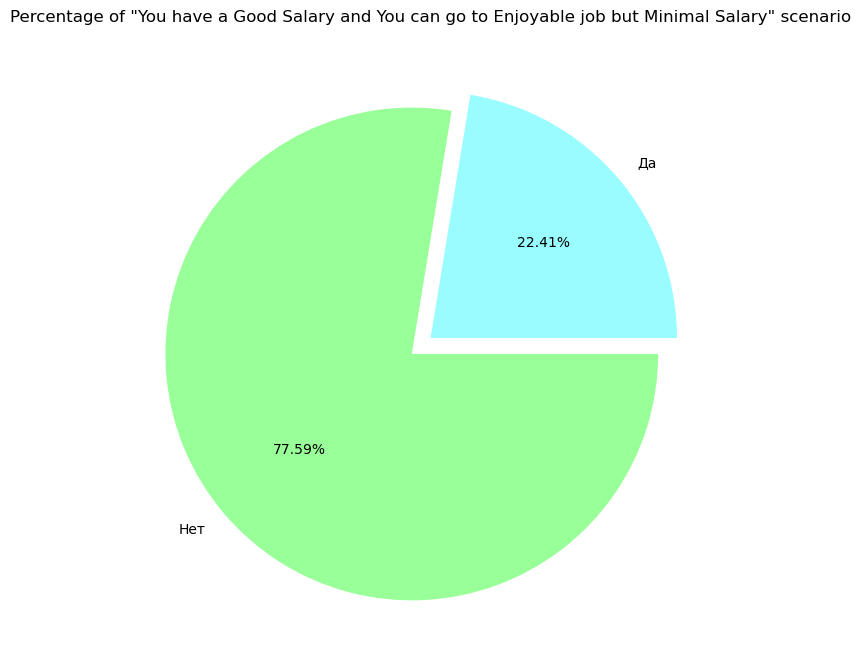

In [26]:
arr=[13,45]
labels=['Да','Нет']
colors=['#99fcff','#99ff99']
explode=[0.0,0.1]
plt.pie(arr,labels=labels,colors=colors,autopct='%0.2f%%',explode=explode)
plt.title('Percentage of "You have a Good Salary and You can go to Enjoyable job but Minimal Salary" scenario')
plt.gcf().set_size_inches(15, 8)
plt.show();

In [27]:
words = list(df["current_job"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('Бухгалтер', 5),
 ('по', 4),
 ('Маркетолог', 4),
 ('Администратор', 4),
 ('преподаватель', 3),
 ('менеджер', 3),
 ('Преподаватель', 3),
 ('юрист', 2),
 ('Ассистент', 2),
 ('Директор', 2),
 ('Аналитик', 2),
 ('Маркетинг', 2),
 ('Медсестра', 2),
 ('Руководитель', 2),
 ('Инспектор', 1),
 ('таможни', 1),
 ('Лектор', 1),
 ('экономист', 1),
 ('руководителем', 1),
 ('структурного', 1),
 ('подразделения,', 1),
 ('экономика', 1),
 ('ГЗ', 1),
 ('профессора', 1),
 ('главный', 1),
 ('Теплоэнергетик', 1),
 ('специалист', 1),
 ('запускам', 1),
 ('Эксперт', 1),
 ('дизайну', 1),
 ('коммуникаций', 1),
 ('Координатор', 1),
 ('карьерного', 1),
 ('развития', 1),
 ('Копирайтер', 1),
 ('Няня', 1),
 ('Администрации', 1),
 ('Процедурная', 1),
 ('медсестра', 1),
 ('Библиотекарь', 1)]

In [28]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

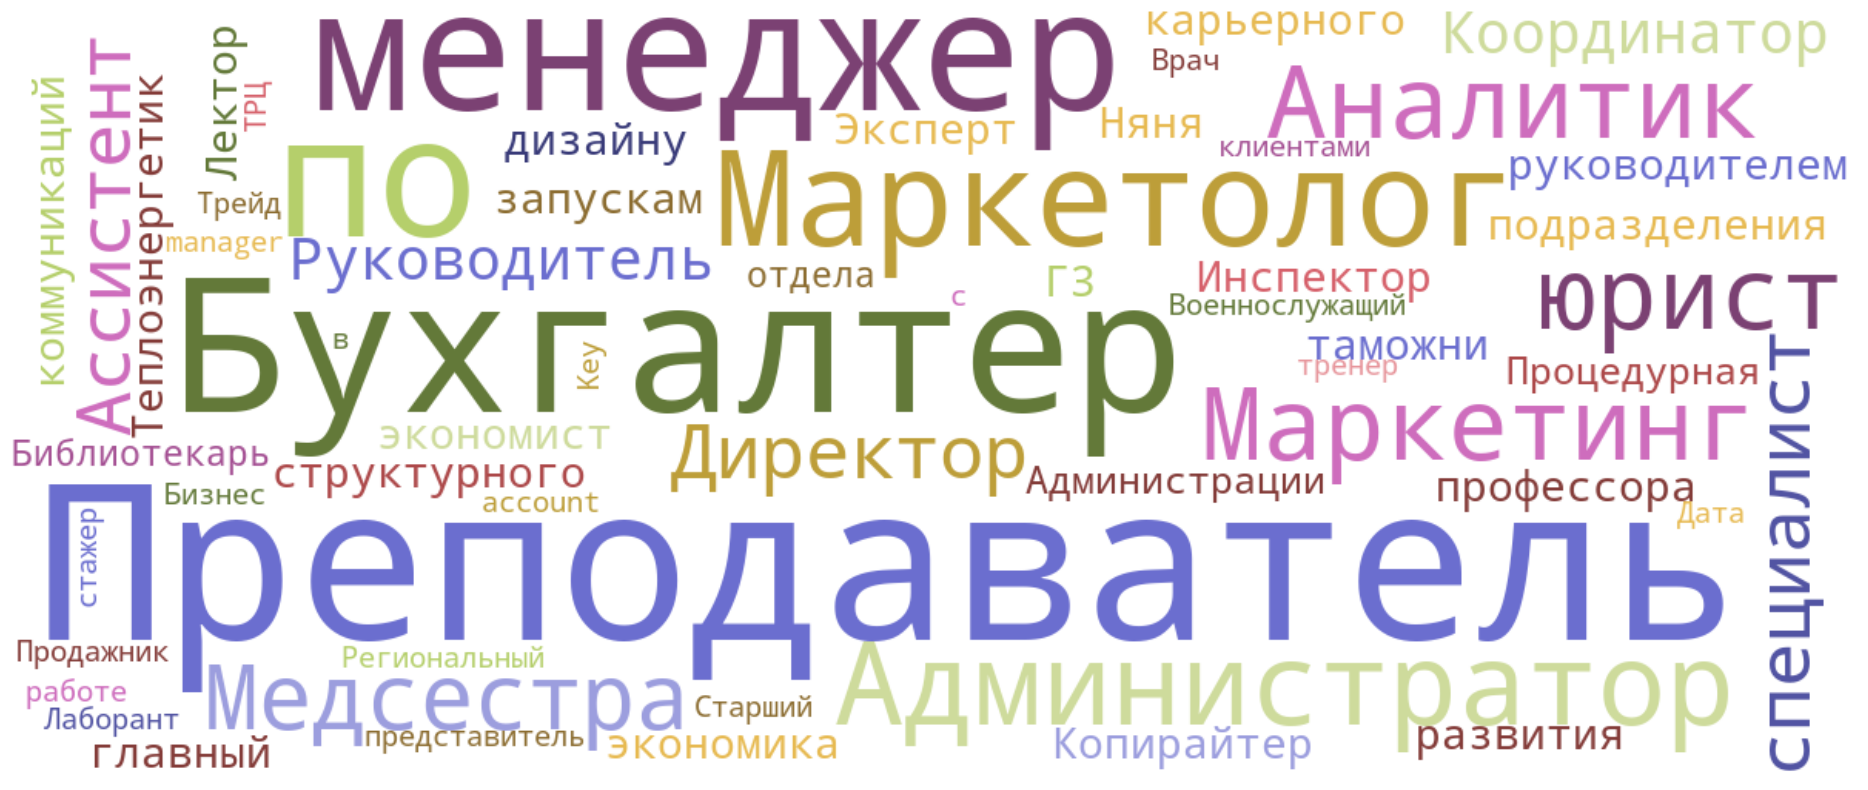

In [29]:
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [30]:
sss=list(df['pref_specialty'])
sss=[y for y in sss]
Counter(sss).most_common(40)

[('Все устраивает', 39),
 ('IT', 2),
 ('Предприниматель', 2),
 ('аналитик', 1),
 ('Математик', 1),
 ('Веб-разработчик', 1),
 ('Медсестра', 1),
 ('Преподаватель', 1),
 ('Директор', 1),
 ('Дизайнер', 1),
 ('Флорист', 1),
 ('Графический дизайнер', 1),
 ('Журналист', 1),
 ('Благотворительность', 1),
 ('Гид', 1),
 ('3D artist', 1),
 ('Художник', 1),
 ('Бухгалтер', 1)]

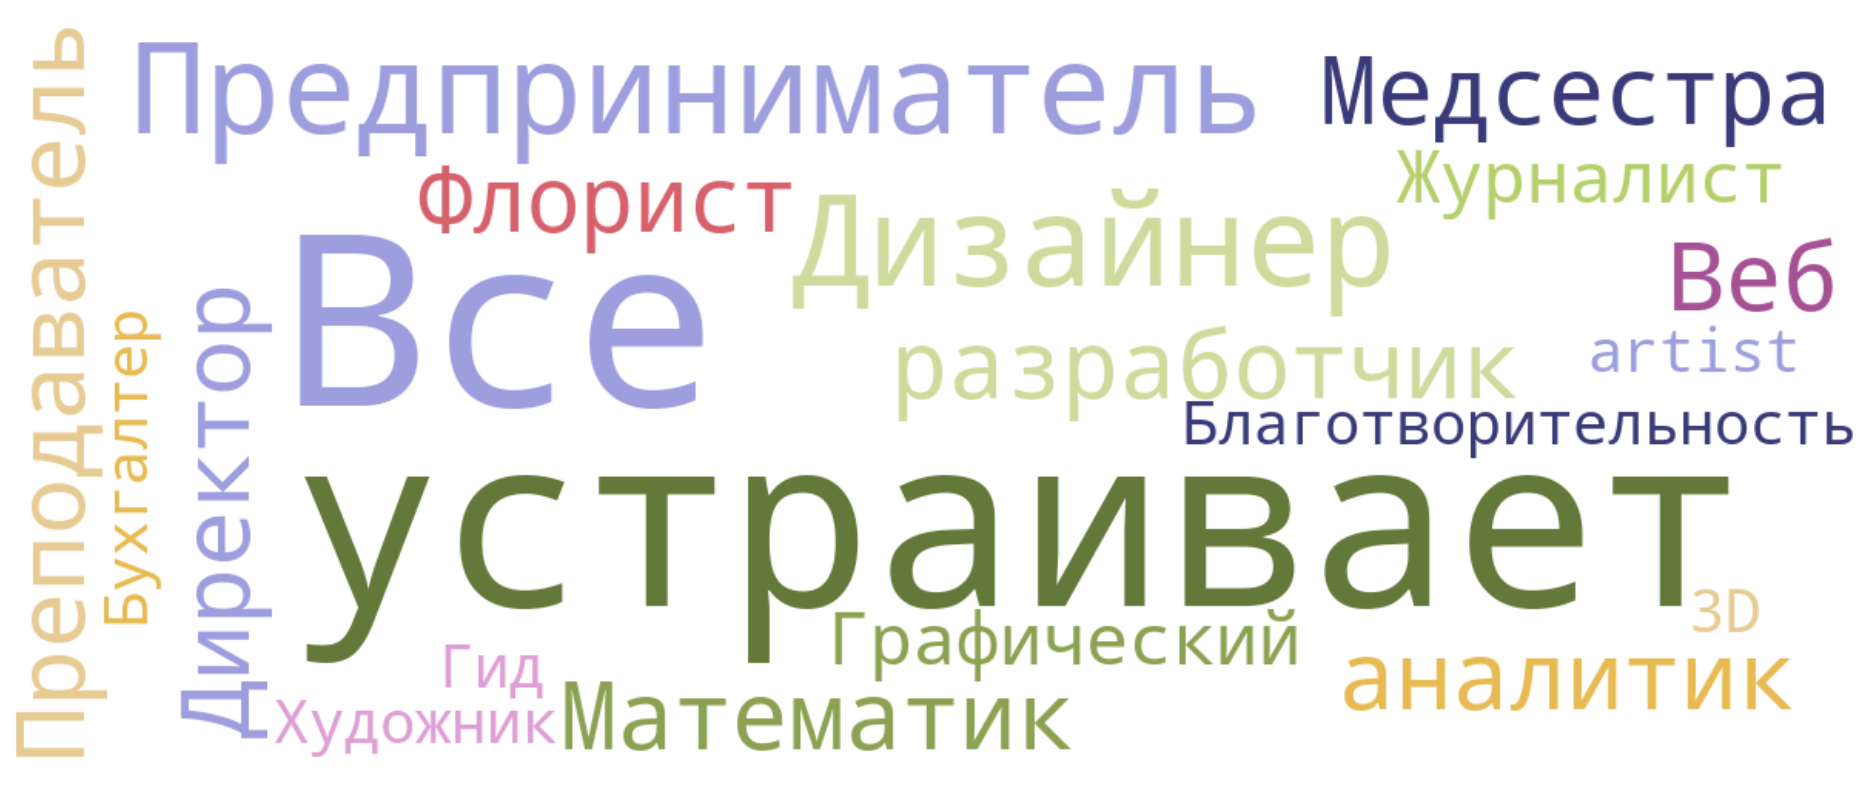

In [31]:
wy = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(sss))
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wy, interpolation='bilinear')
_ = plt.axis("off")

In [32]:
df.head(1)

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type
0,Муж,Инспектор таможни,Нет,IT,Начальство;Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,ISTJ


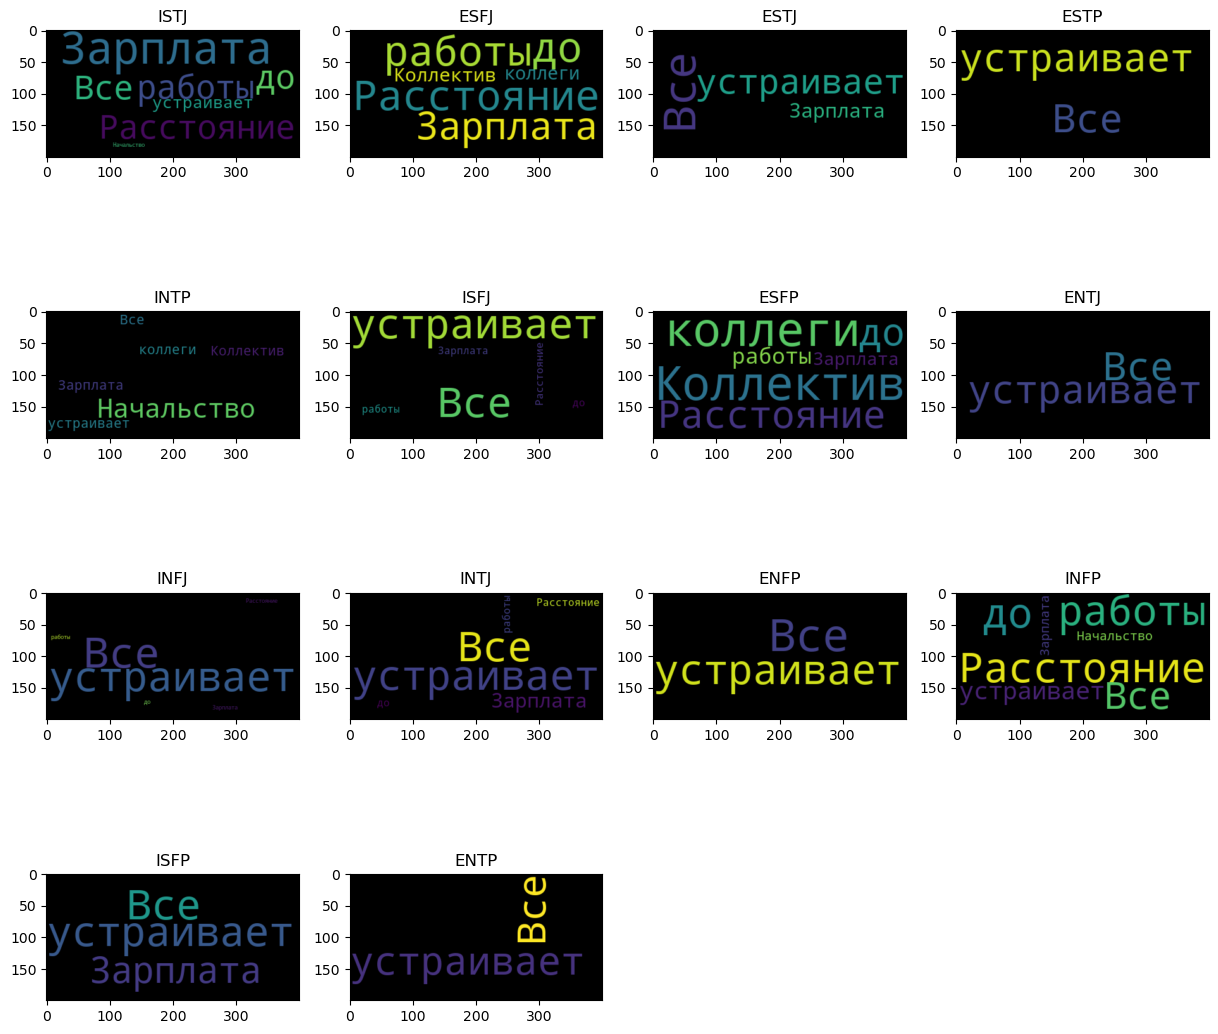

In [33]:
fig, ax = plt.subplots(len(df['personality_type'].unique()), sharex=True, figsize=(15,len(df['personality_type'].unique())))
k = 0
for i in df['personality_type'].unique():
    df_4 = df[df['personality_type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['not_pref_confitions'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [34]:
df.head()

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type
0,Муж,Инспектор таможни,Нет,IT,Начальство;Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,ISTJ
1,Жен,преподаватель,Да,аналитик,Коллектив (коллеги);Расстояние до работы,Удовлетворительная,Нет,Нет,Да,Нет,Нет,Зарплата;Коллектив (коллеги);Расстояние до работы,высщее,ESFJ
2,Муж,Лектор,Да,Все устраивает,Зарплата,Минимальная,Да,Да,Нет,Нет,Нет,Начальство;Коллектив (коллеги),Masters in Computer Science,ESFJ
3,Жен,экономист,Да,Все устраивает,Все устраивает,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата;Расстояние до работы,экономика,ESTJ
4,Муж,"руководителем структурного подразделения, юрист",Да,Все устраивает,Все устраивает,Удовлетворительная,Нет,Да,Нет,Да,Нет,Ни один,юрист,ISTJ


In [35]:
def preprocess_text(df, remove_special=True):
    texts = df['not_pref_confitions'].copy()
    labels = df['personality_type'].copy()

    
    #Keep the End Of Sentence characters
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip Punctation
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Convert posts to lowercase
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove very short or long words
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["not_pref_confitions"] = df["not_pref_confitions"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove MBTI Personality Words - crutial in order to get valid model accuracy estimation for unseen data. 
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")
    
    return df

#Preprocessing of entered Text
new_df = preprocess_text(df)

In [36]:
df

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type
0,Муж,Инспектор таможни,Нет,IT,начальстворасстояние работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,ISTJ
1,Жен,преподаватель,Да,аналитик,коллектив коллегирасстояние работы,Удовлетворительная,Нет,Нет,Да,Нет,Нет,Зарплата;Коллектив (коллеги);Расстояние до работы,высщее,ESFJ
2,Муж,Лектор,Да,Все устраивает,зарплата,Минимальная,Да,Да,Нет,Нет,Нет,Начальство;Коллектив (коллеги),Masters in Computer Science,ESFJ
3,Жен,экономист,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата;Расстояние до работы,экономика,ESTJ
4,Муж,"руководителем структурного подразделения, юрист",Да,Все устраивает,устраивает,Удовлетворительная,Нет,Да,Нет,Да,Нет,Ни один,юрист,ISTJ
5,Жен,экономика,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Да,Нет,Да,Зарплата;Начальство;Коллектив (коллеги);Рассто...,экономика,ESTJ
6,Жен,менеджер по ГЗ,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Нет,Ни один,Учет и аудит,ESTP
7,Муж,Ассистент профессора,Да,IT,зарплатаначальство,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,Математика,INTP
8,Жен,главный менеджер,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Да,Ни один,юриспруденция,ISFJ
9,Муж,Теплоэнергетик,Да,Все устраивает,начальствоколлектив коллеги,Минимальная,Нет,Нет,Нет,Нет,Да,Зарплата,Теплоэнергетик,INTP


In [37]:
from sklearn.preprocessing import OneHotEncoder



ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['norm_sal_good_job_min_sal','good_sal_good_job_min_sal',
                                    'norm_sal_bad_job_good_sal','min_sal_bad_job_norm_sal','min_sal_bad_job_good_sal']]).toarray()
df['encoded']=transformed.tolist()
df

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type,encoded
0,Муж,Инспектор таможни,Нет,IT,начальстворасстояние работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,ISTJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ..."
1,Жен,преподаватель,Да,аналитик,коллектив коллегирасстояние работы,Удовлетворительная,Нет,Нет,Да,Нет,Нет,Зарплата;Коллектив (коллеги);Расстояние до работы,высщее,ESFJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
2,Муж,Лектор,Да,Все устраивает,зарплата,Минимальная,Да,Да,Нет,Нет,Нет,Начальство;Коллектив (коллеги),Masters in Computer Science,ESFJ,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
3,Жен,экономист,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата;Расстояние до работы,экономика,ESTJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ..."
4,Муж,"руководителем структурного подразделения, юрист",Да,Все устраивает,устраивает,Удовлетворительная,Нет,Да,Нет,Да,Нет,Ни один,юрист,ISTJ,"[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
5,Жен,экономика,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Да,Нет,Да,Зарплата;Начальство;Коллектив (коллеги);Рассто...,экономика,ESTJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ..."
6,Жен,менеджер по ГЗ,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Нет,Ни один,Учет и аудит,ESTP,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
7,Муж,Ассистент профессора,Да,IT,зарплатаначальство,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,Математика,INTP,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ..."
8,Жен,главный менеджер,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Да,Ни один,юриспруденция,ISFJ,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."
9,Муж,Теплоэнергетик,Да,Все устраивает,начальствоколлектив коллеги,Минимальная,Нет,Нет,Нет,Нет,Да,Зарплата,Теплоэнергетик,INTP,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."


In [38]:
from sklearn.preprocessing import OneHotEncoder



ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['changing_factors']]).toarray()
df['changing_factors_encoded']=transformed.tolist()
df

,gender,current_job,like_job,pref_specialty,not_pref_confitions,salary_type,norm_sal_good_job_min_sal,good_sal_good_job_min_sal,norm_sal_bad_job_good_sal,min_sal_bad_job_norm_sal,min_sal_bad_job_good_sal,changing_factors,your_speciality,personality_type,encoded,changing_factors_encoded
0,Муж,Инспектор таможни,Нет,IT,начальстворасстояние работы,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,высшее,ISTJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Жен,преподаватель,Да,аналитик,коллектив коллегирасстояние работы,Удовлетворительная,Нет,Нет,Да,Нет,Нет,Зарплата;Коллектив (коллеги);Расстояние до работы,высщее,ESFJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Муж,Лектор,Да,Все устраивает,зарплата,Минимальная,Да,Да,Нет,Нет,Нет,Начальство;Коллектив (коллеги),Masters in Computer Science,ESFJ,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,Жен,экономист,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата;Расстояние до работы,экономика,ESTJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,Муж,"руководителем структурного подразделения, юрист",Да,Все устраивает,устраивает,Удовлетворительная,Нет,Да,Нет,Да,Нет,Ни один,юрист,ISTJ,"[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,Жен,экономика,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Да,Нет,Да,Зарплата;Начальство;Коллектив (коллеги);Рассто...,экономика,ESTJ,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
6,Жен,менеджер по ГЗ,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Нет,Ни один,Учет и аудит,ESTP,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,Муж,Ассистент профессора,Да,IT,зарплатаначальство,Удовлетворительная,Нет,Нет,Да,Да,Да,Зарплата,Математика,INTP,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,Жен,главный менеджер,Да,Все устраивает,устраивает,Удовлетворительная,Нет,Нет,Нет,Нет,Да,Ни один,юриспруденция,ISFJ,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,Муж,Теплоэнергетик,Да,Все устраивает,начальствоколлектив коллеги,Минимальная,Нет,Нет,Нет,Нет,Да,Зарплата,Теплоэнергетик,INTP,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
